In [1]:
from __future__ import print_function

from traitlets.config.manager import BaseJSONConfigManager
path = '/Users/jmk/anaconda2/envs/data601/etc/jupyter/nbconfig'
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
              'theme': 'night',
              'scroll': True,
              #'transition': 'zoom',
              'start_slideshow_at': 'selected',
})

{'scroll': True, 'start_slideshow_at': 'selected', 'theme': 'night'}

# Machine Learning

> Making decisions or predictions from patterns observed in data gives "computers the ability to learn without being explicitly programmed." 
>
> [Arthur Samuels, 1959]

In short, we predict things.  

## ... on terminology
* People will often talk about the generated code as being a **“model”** a **“classifier”** or a **“regressor”**.   
* Sometimes they use the word “algorithm” here, but I’ll tend to reserve that for the type of machine learning we’re doing (e.g. deep learning, SVMs, naive Bayes) and not the _output_ of the machine learning algorithm

So _machine learning_ is applying an _algorithm_ to _data_ to produce a _model_ that makes _predictions_.

# Supervised vs. Unsupervised

Machine learning algorithms fall into two broad buckets:
    
* **Supervised learning** - where we know the answer we want for a large number of samples and we want to learn to predict the answer for new ones
* **Unsupervised learning** - where we don't have any particular answers in mind (much more useful for exploratory analysis)

For now we'll focus on supervised learning.

# Supervised Learning

* Data includes one attribute we want to learn to predict
  * This is called the **target variable** or often just **_y_**.
* All the other columns are often called **_X_**.
* Our ML model is then a function, _f_ that maps **_f(X) = y_**.

* Data with an included target are called "labelled data" (sometimes also "ground truth")
* Data without an included target are called "unlabelled" and are mostly useless for supervised learning

In supervised learning we'll use the labelled training data to "learn from".  We define a "cost function" which helps us define how "wrong" an answer might be in order to decide how much to "correct" later predictions.

# Examples of supervised machine learning models

* Given an email as input, classify it as _spam_ or _not-spam_
* Given data about a house, predict its sale price
* Given a date, predict that day's rainfall
* Given a website visitor, predict if they're likely to sign up
* Given a network traffic stream, predict if it's normal or malicious

# Two major types of problems we solve with ML

* Classification - Given two (or more) _classes_, which class does each sample belong to
* Regression - Given an input, predict a continuous output variable (e.g. temperature, house price)

#  What does this all really mean?  What does it look like?

Let's simplify things a little and look at a set of points.  

In [3]:
#  Some boilerplate for visualization...
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from pandas import DataFrame
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, centers=2, random_state=42)
df = DataFrame(X)

#  Add the target variable into the dataframe (this let's seaborn color based on it)
df['target'] = y

#  Name the columns for sanity's sake...
df.columns = ['x', 'y', 'target']
print(df.shape)
df.head()

(100, 3)


,x,y,target
0,-2.988372,8.828627,0
1,5.722930,3.026972,1
2,-3.053580,9.125209,0
3,5.461939,3.869963,1
4,4.867339,3.280312,1


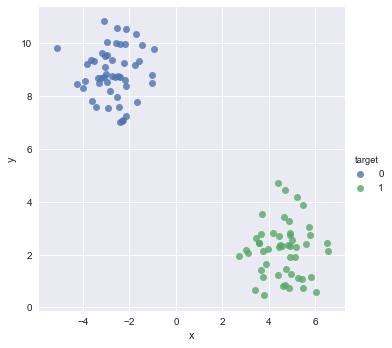

In [4]:
#  Let's plot our dataset on a 2D grid ...
import numpy as np

facetgrid = sns.lmplot(data=df, x='x', y='y', hue='target', fit_reg=False)

Note that we have two "blobs" that are different colors.

These are different _classes_ in our dataset.  The blue dots are one class (class 0) and the green dots are another (class 1).

The process of "learning a model" to classify these points learns to draw a line between them.  On one side of the line is class 0, the other side is class 1.

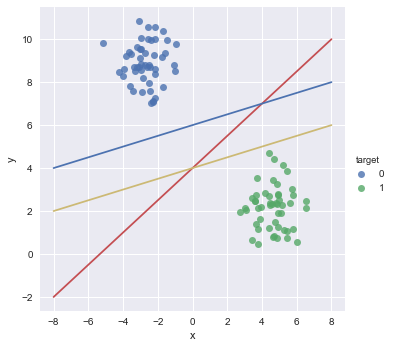

In [5]:
facetgrid = sns.lmplot(data=df, x='x', y='y', hue='target', fit_reg=False)
plt.plot([-8, 8], [-2, 10], color='r')
#  Note that there are lots of other possible lines separating these
plt.plot([-8, 8], [2, 6], color='y')
plt.plot([-8, 8], [4, 8], color='b')
#  Note that this takes the two x arguments first, then the two y arguments

The algorthims we discuss are all different strategies to take samples from the two classes and pick a **"decision boundary"** that "generalizes" well to unseen data.

In [6]:
from sklearn.linear_model import LogisticRegression

#  Let's create a logistic regression classifier 
#  (we'll talk about the details of this later)
#
#  In sklearn parlance, this is an Estimator and can be .fit()
#  to data and can .predict() on data.
clf = LogisticRegression()
clf.fit(X, y)

#  Now we're done training.
new_examples = [
    [-4, 10],
    [10, -4]
]

#  Let's see where we predict these new samples lie.
clf.predict(new_examples)

array([0, 1])

Now let's look at the actual model we've produced.

Curiously, this is WAY more complex than it probably should be in sklearn.  ;)

This happens in three parts:

* Make a grid of all the samples in the space
* Evaluate the classifier on all of them
* Plot the results

In [7]:
#  This is sort of boilerplate for now.  
#  
#  It creates a grid on which we can show the decision boundary.
xx, yy = np.mgrid[-10:10:.01, -4:12:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

#  Observe that grid is now the set of all points on the diagram 
#  above, by 0.01 increments.
grid

array([[-10.  ,  -4.  ],
       [-10.  ,  -3.99],
       [-10.  ,  -3.98],
       ...,
       [  9.99,  11.97],
       [  9.99,  11.98],
       [  9.99,  11.99]])

[(-4, 12), Text(0,0.5,'$X_2$'), (-10, 10), Text(0.5,0,'$X_1$'), None]

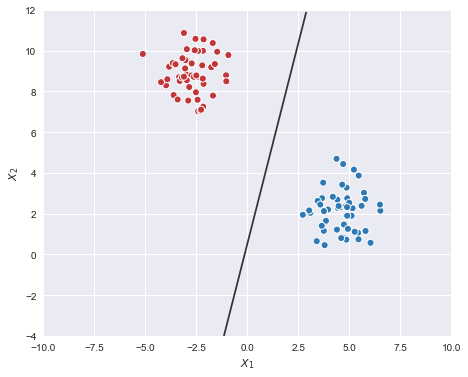

In [13]:
#  Now we want to predict over the entire grid.  That is, we want to
#  predict the probability of class 0 for each point in the plane.
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

#  Then we plot this as a contour plot showing only the decision
#  boundary (level=0.5 is the midpoint)
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

#  Then add the training data samples on top.
ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

#  ... and add some labels.
ax.set(aspect="equal",
       xlim=(-10, 10), ylim=(-4, 12),
       xlabel="$X_1$", ylabel="$X_2$")

In [9]:
#  We can make predictions for individual points too.  
#  Note that predict takes a list of samples that are 
#  of the same form as the training inputs (in this case, 
#  (x,y) pairs)
clf.predict([[-0.3, 0], [0.1, 0]])

array([0, 1])

In [10]:
#  Or predict the probabilities of each class.
clf.predict_proba([[-0.3, 0], [0.1, 0]])

array([[0.5569519 , 0.4430481 ],
       [0.42032092, 0.57967908]])

[(-4, 12), Text(0,0.5,'$X_2$'), (-10, 10), Text(0.5,0,'$X_1$'), None]

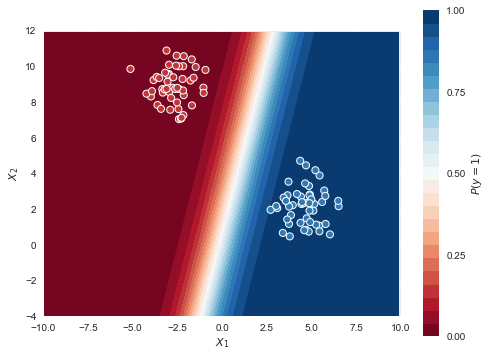

In [11]:
xx, yy = np.mgrid[-10:10:.1, -4:12:.1]
grid = np.c_[xx.ravel(), yy.ravel()]

#  Calculate the probability of class 1 for each sample
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

#  Use this version to show just the classes, not the probability.
#probs = clf.predict(grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-10, 10), ylim=(-4, 12),
       xlabel="$X_1$", ylabel="$X_2$")

In [12]:
dir(clf)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

# What does that have to do with spam, rainfall, house prices or _anything_!?

Imagine if we took real world samples and plotted them into a 2D plane.

_If_ we could do that, we could use the same line-drawing procedure.

It turns out ML meets us half-way.  As long as we can represent our data as vectors of numbers, the algorithms generalize to dimensions beyond 2.  So we can learn to draw:

* a line as a decision boundary in 2-dimensions, 
* a surface as the decision boundary in 3-dimensions,
* a _hyperplane_ of dimension _n-1_ as the decision boundary in _n_-dimenions 

All of these are lower dimensional boundaries that can bisect a space in higher dimensions.